# Introduction

This is a simple natural language processing (NLP) project that analyzes three Kanye West albums. 

The project serves four purposes:
1. Identify significant words within each album
2. Provide a quantitative measure of similarity between the tracks within each album
3. Provide a quantitative measure of similarity between the three albums
4. Obtain a sense of how Kanye West has (or has not) evolved through the years in regards to his use of vocabulary. The albums selected are exactly six years apart, spanning a total of 12 years.

**Please be advised**: Explicit content exists ahead! Profanity and offensive language used by Kanye West in his lyrics were not excluded in the analysis.

Albums used:
- Life of Pablo (2016)
- My Beautiful Dark Twisted Fantasy (2010)
- The College Dropout (2004)

**Note:** Only lyrics vocalized by Kanye West himself were included in the analysis. Features from other artists were excluded to minimize deviations and uphold the integrity of the analysis as much as possible. As a result, multiple tracks may seem heavily reduced in terms of lyrical length. Additionally, tracks entirely without Kanye West vocals were completely excluded as well.
 
Lyrics were retrieved from Genius Media Group Inc. at http://www.genius.com
 
The program was run on Python 3.5.2 with the following:
 - pandas
     - DataFrame()
     - max()
     - sort_values()
     - idxmax()
     - toarray()
    
 - matplotlib
     - pcolor()
     - plot()
     
 - scikit-learn
     - cosine_similarity()
     - feature_extraction
         - Tfidfvectorizer()
         - fit_transform()
         - get_feature_names()
 -----

# Part 1: Lyric Preparation for Analysis

## Load Lyrics

Track lyrics for each album were saved as separate plaintext files. The collection of lyrics formed the corpus for the analysis.

In [2]:
import os
def load_all_lyrics(directory):
    files = [file for file in os.listdir(directory) if not file.startswith('.')] #defeat hidden files, if any
    files = [file for file in files if not os.path.isdir(os.path.join(directory, file))==True] #defeat directories

    lyrics = []
    file_names = []
    for file in files:
        with open(os.path.join(directory,file), encoding = "UTF-8") as plaintext:
            lines = plaintext.readlines()
            track = " ".join(lines)
            lyrics.append(track)
            file_names.append(file) #keep track of file names
    return lyrics, file_names

In [3]:
lyrics_tlop, file_names_tlop = load_all_lyrics('/Users/g_quest/Google Drive/Columbia University/Courses/Fall 2016/Computing in Context/proj3/Lyrics/Kanye West/The Life of Pablo/')
lyrics_tcd, file_names_tcd = load_all_lyrics('/Users/g_quest/Google Drive/Columbia University/Courses/Fall 2016/Computing in Context/proj3/Lyrics/Kanye West/The College Dropout/')
lyrics_mbdtf, file_names_mbdtf = load_all_lyrics('/Users/g_quest/Google Drive/Columbia University/Courses/Fall 2016/Computing in Context/proj3/Lyrics/Kanye West/My Beautiful Dark Twisted Fantasy/')

## Track Names (for reference)
**Note**: Associated index number is NOT the actual track number (see note in introduction).

In [4]:
print('The Life of Pablo:\n')
for files in file_names_tlop:
    print('#{}: {}'.format(int(file_names_tlop.index(files)), files[:-4]))
print('\n')
print('My Beautiful Dark Twisted Fantasy:\n')
for files in file_names_mbdtf:
    print('#{}: {}'.format(int(file_names_mbdtf.index(files)), files[:-4]))
print('\n')
print('The College Dropout:\n')
for files in file_names_tcd:
    print('#{}: {}'.format(int(file_names_tcd.index(files)), files[:-4]))

The Life of Pablo:

#0: 30 Hours
#1: Facts (Charlie Heat Version)
#2: Fade
#3: Famous
#4: Father Stretch My Hands, Pt. 1
#5: Feedback
#6: FML
#7: Freestyle 4
#8: Highlights
#9: I Love Kanye
#10: No More Parties in LA
#11: Pt. 2
#12: Real Friends
#13: Saint Pablo
#14: Ultralight Beam
#15: Waves
#16: Wolves


My Beautiful Dark Twisted Fantasy:

#0: All of the Lights
#1: Blame Game
#2: Dark Fantasy
#3: Devin in a New Dress
#4: Gorgeous
#5: Hell of a Life
#6: Lost in the World
#7: Monster
#8: Power
#9: Runaway
#10: See Me Now
#11: So Appalled


The College Dropout:

#0: All Falls Down
#1: Breathe In Breathe Out
#2: Family Business
#3: Get Em High
#4: Jesus Walks
#5: Last Call
#6: Never Let Me Down
#7: School Spirit
#8: Slow Jamz
#9: Spaceship
#10: The New Workout Plan
#11: Through the Wire
#12: Two Words
#13: We Don't Care


## Clean Data

The following techniques were used to clean the lyrics for analysis:
- removed excess plaintext characters
- removed general punctuation
- lower cased all terms

**Note**: Techniques such as stemming and lemmatization were not performed. Terms were left unchanged since they are utilized by Kanye 'as is' for the sake of rap music. 

In [5]:
def data_cleanse(docs_to_clean):
	import re
	D = len(docs_to_clean)
	for d in range(0, D):
	    docs_to_clean[d] = docs_to_clean[d].lower()
	    docs_to_clean[d] = re.sub(r'[-\[\]]', ' ', docs_to_clean[d])
	    docs_to_clean[d] = re.sub(r'[^a-zA-Z0-9 ]', '', docs_to_clean[d])
	return docs_to_clean

In [6]:
data_cleanse(lyrics_tlop)

['baby lion goes where the islands go  you say you never saw this comin well youre not alone million dollar renovations to a happy home my ex says she gave me the best years of her life i saw a recent picture of her i guess she was right i wake up assessin the damages checkin mediatakeout pictures of me drunk walkin out with a bitch but its blurry enough to get the fake out i wake up all veggies no eggs i hit the gym all chest no legs yep then i made myself a smoothie yeah then me and wifey make a movie chicago   st louis st louis to chicago ndale ndale ei ei uh oh you had me drivin far enough to switch the time zone you was the best of all time at the time though yeah you wasnt mine though  but i still drove 30 hours and i i still drove 30 hours to you  i remember rappin for jay and cam young producer just trying to get his flows off i remember being nervous to do victorias secret til i pictured everybody with they clothes off expedition was eddie bauer edition im drivin with no winte

In [7]:
data_cleanse(lyrics_mbdtf)

['something wrong i hold my head mj gone our nigga dead i slapped my girl she called the feds i did that time and spent that bread im heading home im almost there im on my way heading up the stairs to my surprise a nigga replacing me i had to take him to that ghetto university  cop lights flash lights spotlights strobe lights street lights fast life drug life thug life rock life every night  restraining order cant see my daughter her mother brother grandmother hate me in that order public visitation we met at borders told her she take me back ill be more supportive i made mistakes i bumped my head courts sucked me dry i spent that bread she need her daddy baby please cant let her grow up in that ghetto university  cop lights flash lights spotlights strobe lights street lights fast life drug life thug life rock life every night',
 'whose fault  on a bathroom wall i wrote id rather argue with you than be with someone else i took a piss and dismiss it like fuck it and i went and found som

In [8]:
data_cleanse(lyrics_tcd)

['yeah this the real one baby  uh chi town stand up  southside southside we gon set this party off right  westside westside we gon set this party off right  man i promise shes so self conscious she has no idea what she doin in college that major that she majored in dont make no money but she wont drop out her parentsll look at her funny now tell me that aint insecurr the concept of school seems so securr sophomore three yurrs aint picked a carurr she like fuck it ill just stay down hurr and do hair cause thats enough money to buy her a few pairs of new airs cause her baby daddy dont really care shes so precious with the peer pressure couldnt afford a car so she named her daughter alexis she had hair so long that it looked like weave then she cut it all off now she look like eve and she be dealin with some issues that you cant believe single black female addicted to retail and well  and when it falls down who you gon call now  cmon cmon and when it falls down  man i promise im so self c

## Vectorize Lyrics and Collect Featured Words
Bag-of-words were collected and then vectorized for analysis through the *tf-idf* technique and stop-word matching. Featured words were kept to a count of around 20 by adjusting `min_df` above.

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_tlop = TfidfVectorizer(min_df = 0.40, stop_words='english', use_idf=True)
vector_matrix_tlop = vectorizer_tlop.fit_transform(lyrics_tlop) # vectorize TLOP lyrics
vectorizer_mbdtf = TfidfVectorizer(min_df = 0.50, stop_words='english', use_idf=True)
vector_matrix_mbdtf = vectorizer_mbdtf.fit_transform(lyrics_mbdtf) # vectorize MBDTF lyrics
vectorizer_tcd = TfidfVectorizer(min_df = 0.55, stop_words='english', use_idf=True)
vector_matrix_tcd = vectorizer_tcd.fit_transform(lyrics_tcd) # vectorize TCD lyrics

In [10]:
featured_words_tlop = vectorizer_tlop.get_feature_names() 
featured_words_mbdtf = vectorizer_mbdtf.get_feature_names()
featured_words_tcd = vectorizer_tcd.get_feature_names()

In [11]:
print('TLOP:', featured_words_tlop)
print('count:', len(featured_words_tlop))
print('\nMBDTF:', featured_words_mbdtf)
print('count:', len(featured_words_mbdtf))
print('\nTCD:', featured_words_tcd)
print('count:', len(featured_words_tcd))

TLOP: ['aint', 'bitch', 'dont', 'feel', 'got', 'im', 'just', 'know', 'let', 'like', 'love', 'make', 'need', 'nigga', 'niggas', 'say', 'shit', 'time', 'yeah']
count: 19

MBDTF: ['aint', 'ass', 'dont', 'got', 'huh', 'im', 'just', 'know', 'life', 'like', 'look', 'love', 'make', 'need', 'nigga', 'said', 'say', 'shit', 'thats', 'time', 'way']
count: 21

TCD: ['aint', 'cause', 'dont', 'gon', 'got', 'im', 'just', 'know', 'like', 'look', 'man', 'right', 'say', 'tell', 'thats', 'want', 'yall', 'yeah']
count: 18


----

# Part 2: Analysis

## Word Significance
The bag-of-words were put into data frames to show each words' significance within each track of each album. The higher the number, the more significant the word is when compared to others. Values of zero simply means the word wasn't used for that particular track. 

In [12]:
import pandas as pd

dataFrame_tlop = pd.DataFrame(vector_matrix_tlop.toarray(), columns = featured_words_tlop, index = file_names_tlop)
dataFrame_mbdtf = pd.DataFrame(vector_matrix_mbdtf.toarray(), columns = featured_words_mbdtf, index = file_names_mbdtf)
dataFrame_tcd = pd.DataFrame(vector_matrix_tcd.toarray(), columns = featured_words_tcd, index = file_names_tcd)

### The Life of Pablo:

In [13]:
dataFrame_tlop

,aint,bitch,dont,feel,got,im,just,know,let,like,love,make,need,nigga,niggas,say,shit,time,yeah
30 Hours.txt,0.000000,0.057124,0.094157,0.000000,0.150254,0.250853,0.592068,0.266002,0.160225,0.418089,0.053408,0.057124,0.050085,0.373858,0.000000,0.053408,0.150254,0.188313,0.267041
Facts (Charlie Heat Version).txt,0.400086,0.000000,0.000000,0.160660,0.075331,0.314417,0.653042,0.066681,0.000000,0.251534,0.080330,0.085918,0.301324,0.000000,0.085918,0.080330,0.225993,0.141618,0.160660
Fade.txt,0.000000,0.000000,0.000000,0.526112,0.000000,0.411849,0.000000,0.000000,0.000000,0.000000,0.526112,0.000000,0.000000,0.526112,0.000000,0.000000,0.000000,0.000000,0.000000
Famous.txt,0.223656,0.576358,0.000000,0.269436,0.252670,0.000000,0.398251,0.223656,0.269436,0.210919,0.000000,0.000000,0.000000,0.000000,0.288179,0.000000,0.000000,0.000000,0.269436
"Father Stretch My Hands, Pt. 1.txt",0.000000,0.000000,0.336215,0.635702,0.000000,0.000000,0.563776,0.211076,0.127140,0.199055,0.000000,0.000000,0.000000,0.000000,0.000000,0.254281,0.000000,0.000000,0.000000
Feedback.txt,0.087895,0.113252,0.093337,0.105886,0.099297,0.331557,0.234764,0.263685,0.105886,0.082889,0.000000,0.226504,0.198594,0.423545,0.000000,0.000000,0.000000,0.653356,0.000000
FML.txt,0.140497,0.000000,0.745978,0.000000,0.000000,0.264992,0.062544,0.070249,0.169256,0.000000,0.507767,0.090515,0.079362,0.084628,0.000000,0.084628,0.000000,0.149196,0.084628
Freestyle 4.txt,0.201596,0.519509,0.428153,0.000000,0.000000,0.190115,0.000000,0.000000,0.000000,0.380229,0.000000,0.000000,0.000000,0.242860,0.000000,0.000000,0.455495,0.000000,0.242860
Highlights.txt,0.156598,0.302663,0.000000,0.000000,0.265369,0.443039,0.069711,0.313196,0.000000,0.073840,0.094326,0.100888,0.442282,0.377304,0.100888,0.000000,0.265369,0.249440,0.094326
I Love Kanye.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348105,0.889368,0.000000,0.000000,0.000000,0.000000,0.222342,0.000000,0.195990,0.000000


#### Highest significance value for each featured word:

In [14]:
(dataFrame_tlop.max()).sort_values(ascending = False)

love      0.889368
need      0.748789
dont      0.745978
feel      0.695737
im        0.687927
know      0.662808
time      0.653356
just      0.653042
like      0.652998
bitch     0.576358
got       0.548074
nigga     0.526112
shit      0.455495
aint      0.400086
niggas    0.337656
say       0.292929
let       0.269436
yeah      0.269436
make      0.226504
dtype: float64

#### Track name where featured word had highest value:

In [15]:
dataFrame_tlop.idxmax()

aint      Facts (Charlie Heat Version).txt
bitch                           Famous.txt
dont                               FML.txt
feel                             Pt. 2.txt
got              No More Parties in LA.txt
im                         Saint Pablo.txt
just      Facts (Charlie Heat Version).txt
know                   Ultralight Beam.txt
let                             Famous.txt
like                             Waves.txt
love                      I Love Kanye.txt
make                          Feedback.txt
need                   Ultralight Beam.txt
nigga                             Fade.txt
niggas                          Wolves.txt
say                        Saint Pablo.txt
shit                       Freestyle 4.txt
time                          Feedback.txt
yeah                            Famous.txt
dtype: object

### My Beautiful Dark Twisted Fantasy:

In [16]:
dataFrame_mbdtf

,aint,ass,dont,got,huh,im,just,know,life,like,...,love,make,need,nigga,said,say,shit,thats,time,way
All of the Lights.txt,0.000000,0.000000,0.000000,0.000000,0.000000,0.217262,0.000000,0.000000,0.938015,0.000000,...,0.000000,0.000000,0.091421,0.198103,0.000000,0.000000,0.000000,0.000000,0.107581,0.117252
Blame Game.txt,0.332437,0.000000,0.000000,0.052234,0.000000,0.044757,0.122432,0.122432,0.072464,0.339001,...,0.797104,0.000000,0.000000,0.061216,0.061216,0.144928,0.000000,0.000000,0.265950,0.000000
Dark Fantasy.txt,0.306556,0.000000,0.306556,0.240838,0.334112,0.206364,0.282250,0.141125,0.000000,0.130253,...,0.000000,0.501168,0.130253,0.282250,0.000000,0.167056,0.000000,0.282250,0.000000,0.000000
Devin in a New Dress.txt,0.200007,0.000000,0.100004,0.157131,0.108993,0.201958,0.000000,0.184149,0.000000,0.084982,...,0.653957,0.217986,0.169963,0.184149,0.184149,0.000000,0.108993,0.184149,0.000000,0.326979
Gorgeous.txt,0.288834,0.104932,0.192556,0.453832,0.000000,0.259246,0.265933,0.000000,0.000000,0.409079,...,0.104932,0.104932,0.245447,0.177289,0.177289,0.104932,0.104932,0.265933,0.096278,0.314797
Hell of a Life.txt,0.000000,0.107965,0.000000,0.155648,0.107965,0.066684,0.091206,0.000000,0.647787,0.084180,...,0.215929,0.539823,0.336720,0.091206,0.091206,0.107965,0.000000,0.182412,0.000000,0.000000
Lost in the World.txt,0.000000,0.073168,0.000000,0.000000,0.000000,0.949033,0.000000,0.000000,0.292671,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.061810,0.000000,0.000000,0.000000,0.067133,0.000000
Monster.txt,0.058033,0.063250,0.000000,0.136778,0.126500,0.351598,0.267161,0.427457,0.000000,0.049316,...,0.063250,0.063250,0.641109,0.374025,0.053432,0.000000,0.126500,0.000000,0.000000,0.000000
Power.txt,0.162373,0.088484,0.081187,0.382694,0.265453,0.655829,0.298998,0.074750,0.088484,0.000000,...,0.000000,0.088484,0.206974,0.000000,0.074750,0.265453,0.176969,0.074750,0.081187,0.176969
Runaway.txt,0.000000,0.000000,0.388672,0.244281,0.000000,0.261642,0.429426,0.500996,0.000000,0.198173,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.338887,0.071571,0.233203,0.254165


#### Highest significance value for each featured word:

In [17]:
(dataFrame_mbdtf.max()).sort_values(ascending = False)

im       0.949033
life     0.938015
love     0.797104
shit     0.699019
need     0.641109
know     0.548788
make     0.539823
got      0.453832
just     0.429426
like     0.409079
dont     0.388672
nigga    0.374025
huh      0.334112
aint     0.332437
way      0.326979
look     0.326979
ass      0.324813
thats    0.282250
time     0.265950
say      0.265453
said     0.184149
dtype: float64

#### Track name where featured word had highest value:

In [18]:
dataFrame_mbdtf.idxmax()

aint               Blame Game.txt
ass                See Me Now.txt
dont                  Runaway.txt
got                  Gorgeous.txt
huh              Dark Fantasy.txt
im          Lost in the World.txt
just                  Runaway.txt
know               See Me Now.txt
life        All of the Lights.txt
like                 Gorgeous.txt
look     Devin in a New Dress.txt
love               Blame Game.txt
make           Hell of a Life.txt
need                  Monster.txt
nigga                 Monster.txt
said     Devin in a New Dress.txt
say                     Power.txt
shit              So Appalled.txt
thats            Dark Fantasy.txt
time               Blame Game.txt
way      Devin in a New Dress.txt
dtype: object

### The College Dropout

In [19]:
dataFrame_tcd

,aint,cause,dont,gon,got,im,just,know,like,look,man,right,say,tell,thats,want,yall,yeah
All Falls Down.txt,0.190860,0.404619,0.163787,0.606928,0.133907,0.109191,0.233918,0.000000,0.267813,0.175438,0.202309,0.269746,0.125467,0.067436,0.272978,0.067436,0.000000,0.067436
Breathe In Breathe Out.txt,0.094514,0.000000,0.216287,0.267157,0.176829,0.648860,0.115836,0.000000,0.442071,0.115836,0.267157,0.133579,0.248526,0.000000,0.108143,0.133579,0.133579,0.000000
Family Business.txt,0.508654,0.089861,0.218251,0.269583,0.178435,0.218251,0.000000,0.291001,0.475825,0.233777,0.179722,0.089861,0.083594,0.179722,0.218251,0.000000,0.179722,0.089861
Get Em High.txt,0.303869,0.000000,0.347687,0.107366,0.213193,0.608453,0.186210,0.086922,0.284257,0.000000,0.322097,0.107366,0.099878,0.322097,0.086922,0.000000,0.000000,0.000000
Jesus Walks.txt,0.297874,0.315743,0.511242,0.000000,0.139325,0.426035,0.091268,0.255621,0.069662,0.000000,0.000000,0.210495,0.293724,0.105248,0.085207,0.105248,0.105248,0.315743
Last Call.txt,0.194786,0.137647,0.111437,0.000000,0.091107,0.445749,0.119365,0.111437,0.273322,0.000000,0.000000,0.000000,0.512192,0.412942,0.000000,0.137647,0.412942,0.000000
Never Let Me Down.txt,0.142784,0.201799,0.326747,0.000000,0.133569,0.163374,0.349991,0.653494,0.133569,0.174996,0.000000,0.000000,0.000000,0.000000,0.163374,0.403598,0.000000,0.000000
School Spirit.txt,0.166832,0.000000,0.000000,0.707358,0.234096,0.286333,0.000000,0.000000,0.156064,0.000000,0.000000,0.000000,0.109671,0.000000,0.381778,0.117893,0.117893,0.353679
Slow Jamz.txt,0.141221,0.000000,0.000000,0.399180,0.264213,0.000000,0.000000,0.484756,0.396320,0.346160,0.399180,0.199590,0.000000,0.000000,0.000000,0.199590,0.000000,0.000000
Spaceship.txt,0.618088,0.000000,0.141444,0.000000,0.115639,0.424331,0.151505,0.141444,0.115639,0.151505,0.000000,0.000000,0.000000,0.000000,0.141444,0.000000,0.524133,0.174711


#### Highest significance value for each featured word:

In [20]:
(dataFrame_tcd.max()).sort_values(ascending = False)

yeah     0.765094
gon      0.707358
man      0.665724
know     0.653494
im       0.648860
aint     0.618088
cause    0.615335
right    0.528156
yall     0.524133
say      0.512192
dont     0.511242
like     0.475825
tell     0.412942
want     0.403598
thats    0.381778
just     0.349991
look     0.346160
got      0.264213
dtype: float64

#### Track name where featured word had highest value:

In [21]:
dataFrame_tcd.idxmax()

aint                  Spaceship.txt
cause                 Two Words.txt
dont                Jesus Walks.txt
gon               School Spirit.txt
got                   Slow Jamz.txt
im       Breathe In Breathe Out.txt
just          Never Let Me Down.txt
know          Never Let Me Down.txt
like            Family Business.txt
look                  Slow Jamz.txt
man               We Don't Care.txt
right          Through the Wire.txt
say                   Last Call.txt
tell                  Last Call.txt
thats             School Spirit.txt
want          Never Let Me Down.txt
yall                  Spaceship.txt
yeah       The New Workout Plan.txt
dtype: object

---

## Word Similarity Between Tracks
Each track was compared to other tracks within the same album using `cosine_similarity`. Higher numbers between two tracks show higher similarity. This is also represented by a darker shade in its heatmap that follows. Keep in mind that each dark box in the diagonal is due to a comparison to itself. An index number key is provided for reference.

In [22]:
%matplotlib inline
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10)

### The Life of Pablo

In [23]:
tlopDF = pd.DataFrame(cosine_similarity(dataFrame_tlop), columns = file_names_tlop, index = file_names_tlop)

In [24]:
tlopDF

,30 Hours.txt,Facts (Charlie Heat Version).txt,Fade.txt,Famous.txt,"Father Stretch My Hands, Pt. 1.txt",Feedback.txt,FML.txt,Freestyle 4.txt,Highlights.txt,I Love Kanye.txt,No More Parties in LA.txt,Pt. 2.txt,Real Friends.txt,Saint Pablo.txt,Ultralight Beam.txt,Waves.txt,Wolves.txt
30 Hours.txt,1.000000,0.731846,0.328103,0.569477,0.538772,0.678374,0.342666,0.500739,0.609801,0.241821,0.630813,0.430486,0.596812,0.675129,0.213811,0.610866,0.477781
Facts (Charlie Heat Version).txt,0.731846,1.000000,0.256280,0.547892,0.554871,0.527477,0.299060,0.378028,0.575559,0.204620,0.604800,0.692136,0.635154,0.634311,0.269825,0.524981,0.505242
Fade.txt,0.328103,0.256280,1.000000,0.141753,0.334450,0.415091,0.420802,0.206070,0.430595,0.467907,0.457472,0.478189,0.308725,0.360379,0.000000,0.107575,0.221454
Famous.txt,0.569477,0.547892,0.141753,1.000000,0.519254,0.337033,0.140448,0.490144,0.444391,0.073422,0.529668,0.456813,0.355873,0.395022,0.148241,0.620394,0.430776
"Father Stretch My Hands, Pt. 1.txt",0.538772,0.554871,0.334450,0.519254,1.000000,0.316667,0.343936,0.219638,0.120108,0.125829,0.423908,0.732164,0.374194,0.504380,0.139903,0.367895,0.380200
Feedback.txt,0.678374,0.527477,0.415091,0.337033,0.316667,1.000000,0.390549,0.313930,0.759820,0.156906,0.564896,0.510394,0.540894,0.635034,0.323478,0.298871,0.338994
FML.txt,0.342666,0.299060,0.420802,0.140448,0.343936,0.390549,1.000000,0.439200,0.335021,0.499648,0.452801,0.190640,0.612571,0.456942,0.105987,0.337622,0.468115
Freestyle 4.txt,0.500739,0.378028,0.206070,0.490144,0.219638,0.313930,0.439200,1.000000,0.536524,0.132360,0.465868,0.109985,0.591326,0.349957,0.000000,0.841675,0.231889
Highlights.txt,0.609801,0.575559,0.430595,0.444391,0.120108,0.759820,0.335021,0.536524,1.000000,0.158482,0.731040,0.278199,0.599114,0.636186,0.538765,0.422091,0.536330
I Love Kanye.txt,0.241821,0.204620,0.467907,0.073422,0.125829,0.156906,0.499648,0.132360,0.158482,1.000000,0.298165,0.060098,0.103828,0.182909,0.000000,0.227312,0.374358


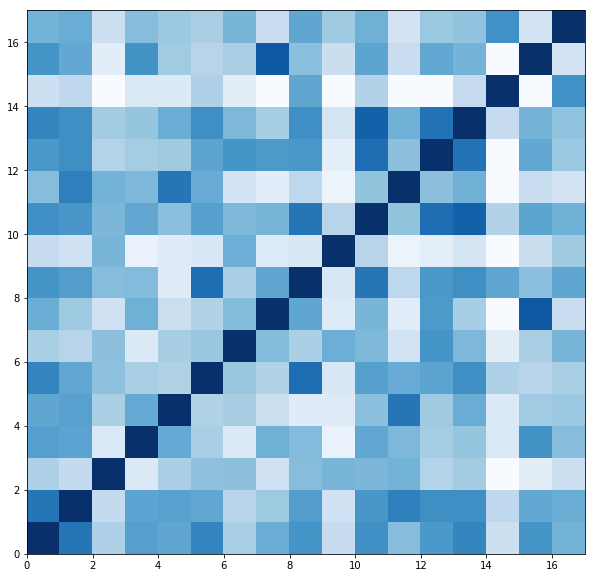

In [25]:
plt.pcolor(tlopDF, norm=None, cmap='Blues')

Index Number Key:

In [26]:
for files in file_names_tlop:
    print('#{}: {}'.format(int(file_names_tlop.index(files)), files[:-4]))

#0: 30 Hours
#1: Facts (Charlie Heat Version)
#2: Fade
#3: Famous
#4: Father Stretch My Hands, Pt. 1
#5: Feedback
#6: FML
#7: Freestyle 4
#8: Highlights
#9: I Love Kanye
#10: No More Parties in LA
#11: Pt. 2
#12: Real Friends
#13: Saint Pablo
#14: Ultralight Beam
#15: Waves
#16: Wolves


### My Beautiful Dark Twisted Fantasy

In [27]:
mbdtfDF = pd.DataFrame(cosine_similarity(dataFrame_mbdtf),columns = file_names_mbdtf, index = file_names_mbdtf)

In [28]:
mbdtfDF

,All of the Lights.txt,Blame Game.txt,Dark Fantasy.txt,Devin in a New Dress.txt,Gorgeous.txt,Hell of a Life.txt,Lost in the World.txt,Monster.txt,Power.txt,Runaway.txt,See Me Now.txt,So Appalled.txt
All of the Lights.txt,1.000000,0.118435,0.112658,0.134235,0.161153,0.670974,0.487941,0.209095,0.273893,0.111735,0.255101,0.071252
Blame Game.txt,0.118435,1.000000,0.261206,0.678908,0.448725,0.296691,0.085322,0.220519,0.220131,0.267584,0.375224,0.169656
Dark Fantasy.txt,0.112658,0.261206,1.000000,0.534924,0.683433,0.533692,0.195846,0.528483,0.637334,0.484050,0.548691,0.375613
Devin in a New Dress.txt,0.134235,0.678908,0.534924,1.000000,0.631615,0.440139,0.203047,0.457420,0.463958,0.400117,0.508361,0.345542
Gorgeous.txt,0.161153,0.448725,0.683433,0.631615,1.000000,0.412073,0.271133,0.527534,0.707482,0.614746,0.716625,0.501549
Hell of a Life.txt,0.670974,0.296691,0.533692,0.440139,0.412073,1.000000,0.266411,0.396401,0.392672,0.124373,0.418048,0.177734
Lost in the World.txt,0.487941,0.085322,0.195846,0.203047,0.271133,0.266411,1.000000,0.341608,0.664845,0.263963,0.317772,0.172509
Monster.txt,0.209095,0.220519,0.528483,0.457420,0.527534,0.396401,0.341608,1.000000,0.608035,0.506928,0.614291,0.478686
Power.txt,0.273893,0.220131,0.637334,0.463958,0.707482,0.392672,0.664845,0.608035,1.000000,0.599210,0.586213,0.445017
Runaway.txt,0.111735,0.267584,0.484050,0.400117,0.614746,0.124373,0.263963,0.506928,0.599210,1.000000,0.650959,0.748408


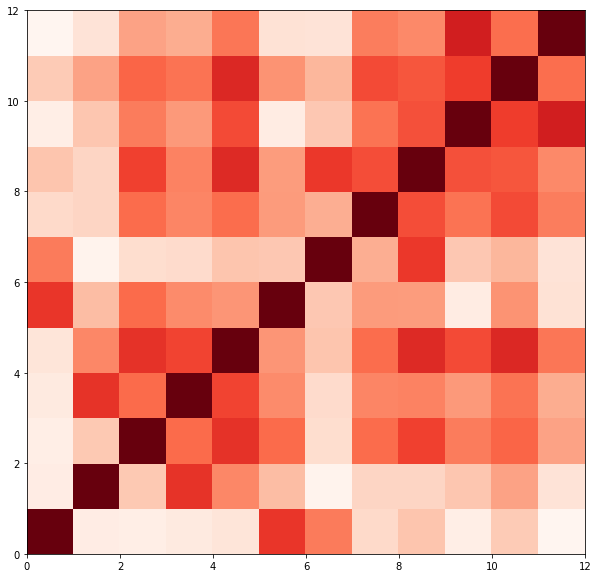

In [29]:
plt.pcolor(mbdtfDF, norm=None, cmap='Reds')

Index Number Key:

In [30]:
for files in file_names_mbdtf:
    print('#{}: {}'.format(int(file_names_mbdtf.index(files)), files[:-4]))

#0: All of the Lights
#1: Blame Game
#2: Dark Fantasy
#3: Devin in a New Dress
#4: Gorgeous
#5: Hell of a Life
#6: Lost in the World
#7: Monster
#8: Power
#9: Runaway
#10: See Me Now
#11: So Appalled


### The College Dropout

In [31]:
tcdDF = pd.DataFrame(cosine_similarity(dataFrame_tcd), columns = file_names_tcd, index = file_names_tcd)

In [32]:
tcdDF

,All Falls Down.txt,Breathe In Breathe Out.txt,Family Business.txt,Get Em High.txt,Jesus Walks.txt,Last Call.txt,Never Let Me Down.txt,School Spirit.txt,Slow Jamz.txt,Spaceship.txt,The New Workout Plan.txt,Through the Wire.txt,Two Words.txt,We Don't Care.txt
All Falls Down.txt,1.000000,0.635740,0.697821,0.546883,0.525904,0.374509,0.418301,0.715343,0.619533,0.346335,0.403683,0.553606,0.618861,0.564200
Breathe In Breathe Out.txt,0.635740,1.000000,0.706299,0.846950,0.619618,0.683346,0.405231,0.600959,0.541977,0.556320,0.326758,0.648915,0.329159,0.613514
Family Business.txt,0.697821,0.706299,1.000000,0.743523,0.645112,0.603039,0.551854,0.599536,0.726835,0.730879,0.599205,0.600949,0.575709,0.552737
Get Em High.txt,0.546883,0.846950,0.743523,1.000000,0.709452,0.682347,0.459018,0.439270,0.446896,0.605507,0.376899,0.640727,0.235523,0.656455
Jesus Walks.txt,0.525904,0.619618,0.645112,0.709452,1.000000,0.671325,0.626200,0.416401,0.293419,0.633734,0.608984,0.453747,0.378374,0.609457
Last Call.txt,0.374509,0.683346,0.603039,0.682347,0.671325,1.000000,0.383655,0.345196,0.241396,0.617727,0.316931,0.376141,0.270086,0.513452
Never Let Me Down.txt,0.418301,0.405231,0.551854,0.459018,0.626200,0.383655,1.000000,0.232667,0.566307,0.429764,0.349815,0.265504,0.578013,0.364310
School Spirit.txt,0.715343,0.600959,0.599536,0.439270,0.416401,0.345196,0.232667,1.000000,0.453156,0.447318,0.474322,0.264639,0.328865,0.294437
Slow Jamz.txt,0.619533,0.541977,0.726835,0.446896,0.293419,0.241396,0.566307,0.453156,1.000000,0.284682,0.383159,0.641293,0.671880,0.464307
Spaceship.txt,0.346335,0.556320,0.730879,0.605507,0.633734,0.617727,0.429764,0.447318,0.284682,1.000000,0.570487,0.398726,0.181532,0.314455


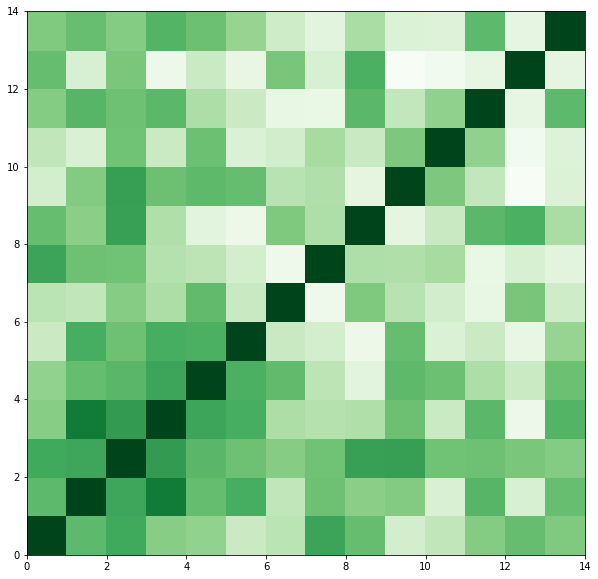

In [33]:
plt.pcolor(tcdDF, norm=None, cmap='Greens')

Index Number Key:

In [34]:
for files in file_names_tcd:
    print('#{}: {}'.format(int(file_names_tcd.index(files)), files[:-4]))

#0: All Falls Down
#1: Breathe In Breathe Out
#2: Family Business
#3: Get Em High
#4: Jesus Walks
#5: Last Call
#6: Never Let Me Down
#7: School Spirit
#8: Slow Jamz
#9: Spaceship
#10: The New Workout Plan
#11: Through the Wire
#12: Two Words
#13: We Don't Care


---

## Comparison Between Albums
Each overall album was compared to the other two. Because the shape of the previous data frames were different between albums, new data frames were created by first making each album into a single collection (versus a list of tracks) and re-vectorizing them to obtain a new bag-of-words. A bar graph is provided for easy visualization. Bars that reach a value of 1.0 is due to a comparison to itself.

In [35]:
tlop_album = ' '.join(lyrics_tlop)
mbdtf_album = ' '.join(lyrics_mbdtf)
tcd_album = ' '.join(lyrics_tcd)

In [36]:
kwalbums = [tlop_album, mbdtf_album, tcd_album]
album_names = ['The Life of Pablo', 'My Beautiful Dark Twisted Fantasy', 'The College Dropout']

vectorizer_kwalbums = TfidfVectorizer(min_df = .70, stop_words='english', use_idf=True)
vector_matrix_kwalbums = vectorizer_kwalbums.fit_transform(kwalbums)
featured_words_kwalbums = vectorizer_kwalbums.get_feature_names()

In [37]:
featured_words_kwalbums

['aint',
 'ask',
 'asking',
 'ass',
 'away',
 'baby',
 'bad',
 'beat',
 'beats',
 'believe',
 'bet',
 'big',
 'bitch',
 'black',
 'blame',
 'bought',
 'bout',
 'broke',
 'called',
 'came',
 'car',
 'cash',
 'cause',
 'check',
 'city',
 'class',
 'coming',
 'cover',
 'crazy',
 'daddy',
 'damn',
 'daughter',
 'day',
 'devil',
 'dick',
 'did',
 'die',
 'different',
 'doing',
 'dont',
 'dreams',
 'drop',
 'em',
 'end',
 'everybody',
 'eyes',
 'fast',
 'fault',
 'feel',
 'feeling',
 'finished',
 'finna',
 'flow',
 'fly',
 'forgot',
 'free',
 'fuck',
 'fuckin',
 'funny',
 'gettin',
 'getting',
 'girl',
 'girls',
 'god',
 'goin',
 'gon',
 'gonna',
 'good',
 'got',
 'gotta',
 'guess',
 'hands',
 'hard',
 'hate',
 'head',
 'heard',
 'hell',
 'help',
 'hes',
 'high',
 'hit',
 'hoes',
 'hold',
 'home',
 'hood',
 'hope',
 'hot',
 'huh',
 'id',
 'ill',
 'im',
 'imma',
 'invited',
 'job',
 'jordan',
 'just',
 'kids',
 'kill',
 'killed',
 'knew',
 'know',
 'let',
 'lets',
 'lies',
 'life',
 'light',


In [38]:
len(featured_words_kwalbums)

224

In [39]:
dataFrame_kwalbums = pd.DataFrame(vector_matrix_kwalbums.toarray(), columns = featured_words_kwalbums, index = album_names)
kwalbumsDF = pd.DataFrame(cosine_similarity(dataFrame_kwalbums), columns = album_names, index = album_names)

In [40]:
kwalbumsDF

,The Life of Pablo,My Beautiful Dark Twisted Fantasy,The College Dropout
The Life of Pablo,1.000000,0.834612,0.805129
My Beautiful Dark Twisted Fantasy,0.834612,1.000000,0.750966
The College Dropout,0.805129,0.750966,1.000000


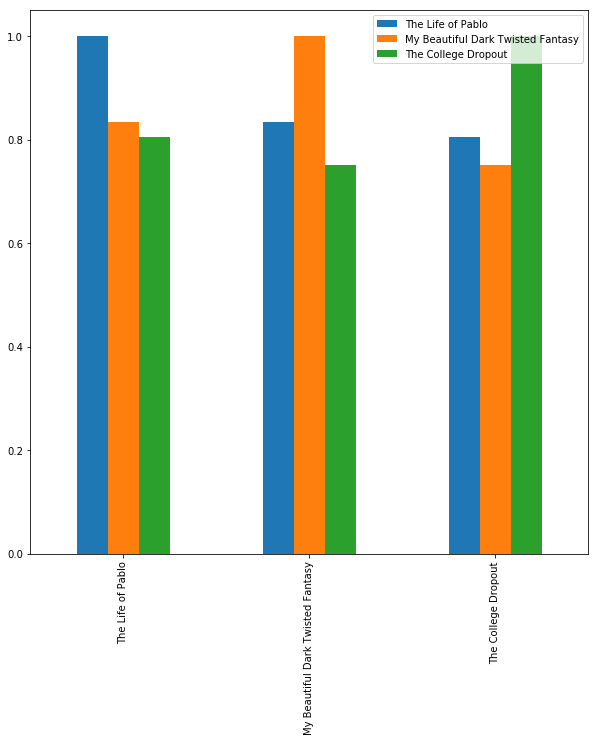

In [44]:
kwalbumsDF.plot(kind='bar')

-----

# Conclusion

Some simple findings:
1. Kanye West showed high similarity across his albums over the span of 12 years.
2. Kanye West uses the word "love" significantly in TLOP and MBDTF, but not in TCD (one of his earliest albums).
3. The word "im" scored relatively high in all three albums, especially in MBDTF where it scored the highest. This could be a reflection of his egotistic nature.

As this was only a simple and introductory analysis on the vocabulary used by Kanye West, the similarity results are actually, in some ways, weak. Better methods for data cleansing, stop-word matching, and bag-of-words collecting would surely tune the results more efficiently.  For example:
- The highest word significance values were only within the track and the album so the information can be misleading.
- Only three albums were used so the data sample is quite small.
- It's rap music. Artists are seen "good" based on the production of the song and how people connect to it, not so much on the choice of words (not going to dismiss vocabulary completely, though).

Regardless, this analysis formed a basic foundation to build upon. From here, other types of analysis can be done, such as a comparison amongst Kanye West's entire discography and a comparison between him and other artists. Furthermore, sentiment analysis and thematic analysis could integrate with an observation of the time period that the album was recorded in to get a sense of what may have influenced Kanye West's vocabulary decisions.